In [59]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
data=pd.read_csv('https://raw.githubusercontent.com/ram30098singh/Dataset/main/RAC_Datset.csv')
data.head()

,Customer_Number,Customer_Status,Age,Gender,Number_of_Dependents,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_Use,Credit_Limit,Yearly_Average_Balance,Yearly_Transaction_Amount,Total_Transactions
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,12691.0,777,1144,42
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,8256.0,864,1291,33
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,3418.0,0,1887,20
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3313.0,2517,1171,20
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,4716.0,0,816,28


In [61]:
data.shape

(10127, 14)

In [62]:
# Create a subset of 1000 records using the sample() function
import random
random.seed(35043)
df = data.sample(n=1000, random_state=35043)
df.head()

,Customer_Number,Customer_Status,Age,Gender,Number_of_Dependents,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_Use,Credit_Limit,Yearly_Average_Balance,Yearly_Transaction_Amount,Total_Transactions
1051,720148983,Existing Customer,54,F,1,Uneducated,Married,Less than $40K,Blue,40,2178.0,1144,1724,47
8118,714320358,Existing Customer,38,F,2,College,Single,Less than $40K,Blue,33,2569.0,1288,4126,56
2070,717171408,Existing Customer,36,M,1,Unknown,Married,$80K - $120K,Blue,26,9959.0,0,2021,41
1729,714772758,Existing Customer,35,F,3,Graduate,Married,Less than $40K,Blue,27,2926.0,1346,1851,48
5509,712428333,Existing Customer,49,M,3,Uneducated,Single,$80K - $120K,Blue,41,2930.0,1901,4041,75


In [63]:
df.shape

(1000, 14)

In [64]:
df.isnull().sum()

Customer_Number              0
Customer_Status              0
Age                          0
Gender                       0
Number_of_Dependents         0
Education_Level              0
Marital_Status               0
Income_Category              0
Card_Category                0
Months_on_Use                0
Credit_Limit                 0
Yearly_Average_Balance       0
Yearly_Transaction_Amount    0
Total_Transactions           0
dtype: int64

In [65]:
df.describe(include=['object'])

,Customer_Status,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,1000,1000,1000,1000,1000,1000
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,841,531,306,465,330,928


In [66]:
df.describe()  

,Customer_Number,Age,Number_of_Dependents,Months_on_Use,Credit_Limit,Yearly_Average_Balance,Yearly_Transaction_Amount,Total_Transactions
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.408869e+08,46.265000,2.397000,35.896000,8920.517800,1143.038000,4394.260000,64.665000
std,3.792369e+07,7.623444,1.300416,7.771202,9053.800271,805.068795,3344.910096,23.002867
min,7.081036e+08,26.000000,0.000000,13.000000,1438.300000,0.000000,602.000000,14.000000
25%,7.131045e+08,41.000000,1.000000,31.000000,2603.750000,361.750000,2174.250000,45.750000
50%,7.181659e+08,46.000000,2.000000,36.000000,5017.500000,1229.500000,3995.500000,67.000000
75%,7.789893e+08,52.000000,3.000000,40.000000,11883.750000,1747.500000,4739.500000,81.000000
max,8.282859e+08,67.000000,5.000000,56.000000,34516.000000,2517.000000,18484.000000,131.000000


## 1. Data Analysis : Descriptive Statistics

In [67]:
gender_counts = df['Gender'].value_counts().to_frame()
gender_counts.rename(columns={'Gender': 'value_counts'}, inplace=True)
gender_counts

,value_counts
F,531
M,469


In [68]:
Customer_Status_counts = df['Customer_Status'].value_counts().to_frame()
Customer_Status_counts.rename(columns={'Customer_Status': 'value_counts'}, inplace=True)
Customer_Status_counts

,value_counts
Existing Customer,841
Attrited Customer,159


In [69]:
Marital_Status_counts = df['Marital_Status'].value_counts().to_frame()
Marital_Status_counts.rename(columns={'Marital_Status': 'value_counts'}, inplace=True)
Marital_Status_counts

,value_counts
Married,465
Single,380
Unknown,80
Divorced,75


<function matplotlib.pyplot.show(close=None, block=None)>

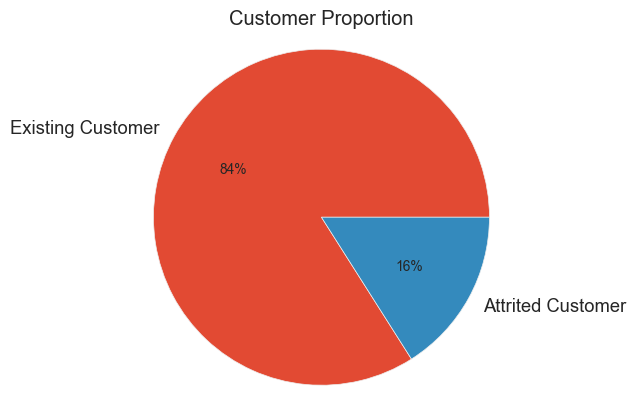

In [70]:
Customer_Status_stats = pd.concat([df['Customer_Status'].value_counts(), df['Customer_Status'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','%'))
plt.pie(Customer_Status_stats['%'], labels=Customer_Status_stats.index, autopct='%0.0f%%') 
plt.axis('equal')
plt.title('Customer Proportion')
plt.show

In [71]:
Card_Category_counts = df['Card_Category'].value_counts().to_frame()
Card_Category_counts.rename(columns={'Card_Category': 'value_counts'}, inplace=True)
Card_Category_counts

,value_counts
Blue,928
Silver,58
Gold,12
Platinum,2


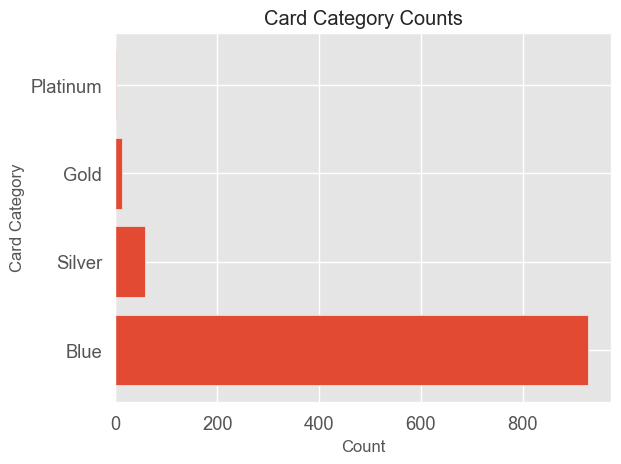

In [72]:
Card_Category_counts = df['Card_Category'].value_counts().to_frame()
Card_Category_counts.rename(columns={'Card_Category': 'value_counts'}, inplace=True)

plt.barh(Card_Category_counts.index, Card_Category_counts['value_counts'])

plt.title('Card Category Counts')
plt.xlabel('Count')
plt.ylabel('Card Category')

plt.show()


In [73]:
Income_Category_counts = df['Income_Category'].value_counts().to_frame()
Income_Category_counts.rename(columns={'Income_Category': 'value_counts'}, inplace=True)
Income_Category_counts

,value_counts
Less than $40K,330
$40K - $60K,194
$80K - $120K,157
$60K - $80K,142
Unknown,111
More than $120K,66


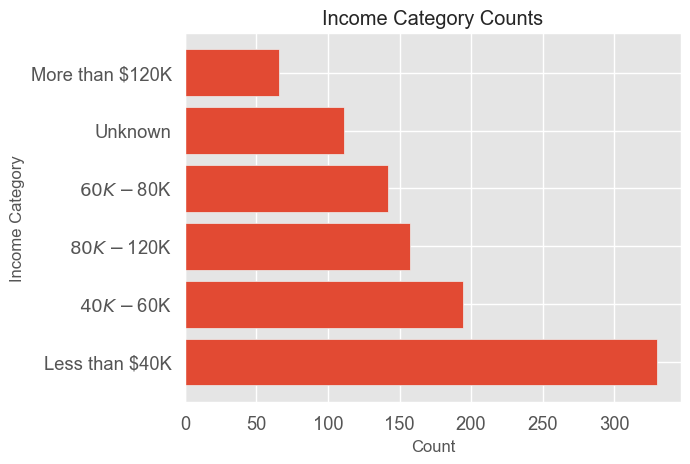

In [74]:
Card_Category_counts = df['Income_Category'].value_counts().to_frame()
Card_Category_counts.rename(columns={'Income_Category': 'value_counts'}, inplace=True)

plt.barh(Card_Category_counts.index, Card_Category_counts['value_counts'])

plt.title('Income Category Counts')
plt.xlabel('Count')
plt.ylabel('Income Category')

plt.show()

In [75]:
df_group_one = df[['Card_Category','Customer_Status','Yearly_Transaction_Amount']]
# grouping results
df_group1 = df_group_one.groupby(['Card_Category'],as_index=False).sum()
df_group1.style.set_properties(**{"background-color": "#679289","color":"white","border": "1px  solid white" })

C:\Users\Dell\AppData\Local\Temp\ipykernel_18064\649789706.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group1 = df_group_one.groupby(['Card_Category'],as_index=False).sum()


,Card_Category,Yearly_Transaction_Amount
0,Blue,3965490
1,Gold,89168
2,Platinum,10345
3,Silver,329257


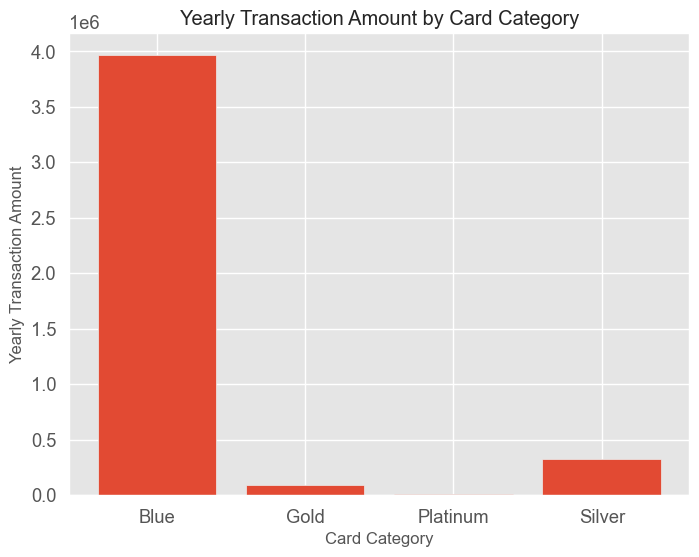

In [76]:

# create a bar chart of yearly transaction amounts by card category
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(df_group1['Card_Category'], df_group1['Yearly_Transaction_Amount'])
ax.set_xlabel('Card Category')
ax.set_ylabel('Yearly Transaction Amount')
ax.set_title('Yearly Transaction Amount by Card Category')

plt.show()


In [77]:
df_group_two = df[['Customer_Status','Card_Category','Yearly_Transaction_Amount']]
# grouping results
df_group2 = df_group_two.groupby(['Customer_Status'],as_index=False).sum()
df_group2.style.set_properties(**{"background-color": "#257896","color":"white","border": "1px  solid white" })

C:\Users\Dell\AppData\Local\Temp\ipykernel_18064\4250838218.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group2 = df_group_two.groupby(['Customer_Status'],as_index=False).sum()


,Customer_Status,Yearly_Transaction_Amount
0,Attrited Customer,509562
1,Existing Customer,3884698


In [78]:
# grouping results
df_gptest = df[['Card_Category','Customer_Status','Yearly_Transaction_Amount']]
grouped_test1 = df_gptest.groupby(['Card_Category','Customer_Status'],as_index=False).sum()
grouped_pivot = grouped_test1.pivot(index='Card_Category',columns='Customer_Status')
grouped_pivot.style.set_properties(**{"background-color": "#985678","color":"white","border": "1px  solid white" })

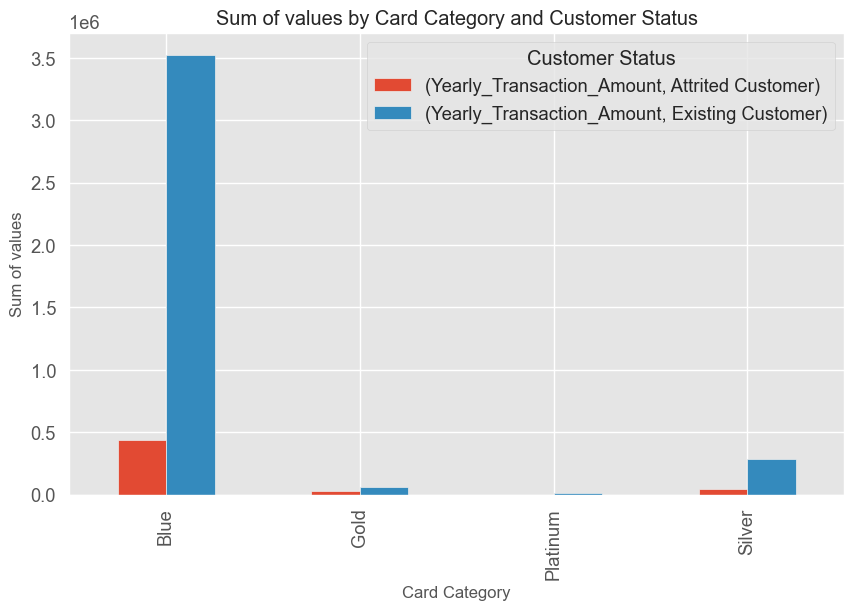

In [79]:
grouped_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Sum of values by Card Category and Customer Status')
plt.xlabel('Card Category')
plt.ylabel('Sum of values')
plt.legend(title='Customer Status')
plt.show()



In [80]:
df_group_three = df[['Gender','Income_Category','Yearly_Transaction_Amount']]
# grouping results
df_group3 = df_group_three.groupby(['Gender'],as_index=False).sum()
df_group3.style.set_properties(**{"background-color": "#679289","color":"white","border": "1px  solid white" })

C:\Users\Dell\AppData\Local\Temp\ipykernel_18064\469885243.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group3 = df_group_three.groupby(['Gender'],as_index=False).sum()


,Gender,Yearly_Transaction_Amount
0,F,2324803
1,M,2069457


In [81]:
# grouping results
df_gptest1 = df[['Gender','Income_Category','Yearly_Transaction_Amount']]
grouped_test2 = df_gptest1.groupby(['Gender','Income_Category'],as_index=False).sum()
grouped_pivot5 = grouped_test2.pivot(index='Gender',columns='Income_Category')
grouped_pivot5.style.set_properties(**{"background-color": "#112552","color":"white","border": "1px  solid white" })

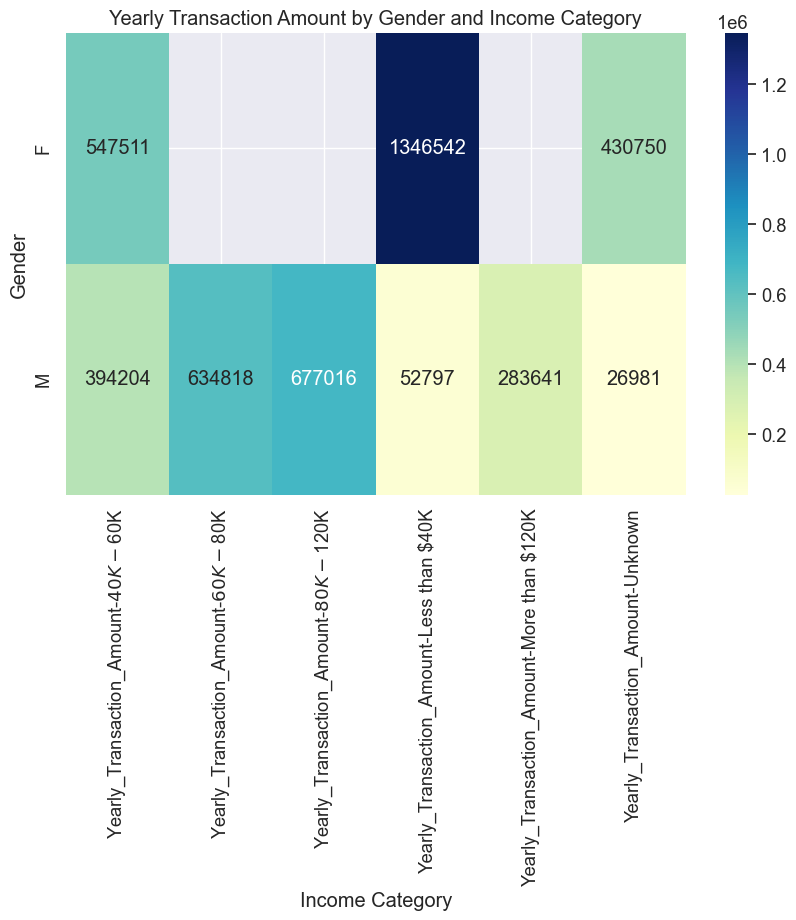

In [82]:
import seaborn as sns
#import matplotlib.pyplot as plt

sns.set(font_scale=1.2)
plt.figure(figsize=(10,6))

# Plot heatmap
sns.heatmap(grouped_pivot5, annot=True, fmt='.0f', cmap='YlGnBu')

# Set title and axis labels
plt.title('Yearly Transaction Amount by Gender and Income Category')
plt.xlabel('Income Category')
plt.ylabel('Gender')

# Show plot
plt.show()



In [83]:
# grouping results
df_gptest2 = df[['Gender','Card_Category','Yearly_Transaction_Amount']]
grouped_test3 = df_gptest2.groupby(['Gender','Card_Category'],as_index=False).sum()
grouped_pivot6 = grouped_test3.pivot(index='Gender',columns='Card_Category')
grouped_pivot6.style.set_properties(**{"background-color": "#256987","color":"white","border": "1px  solid white" })

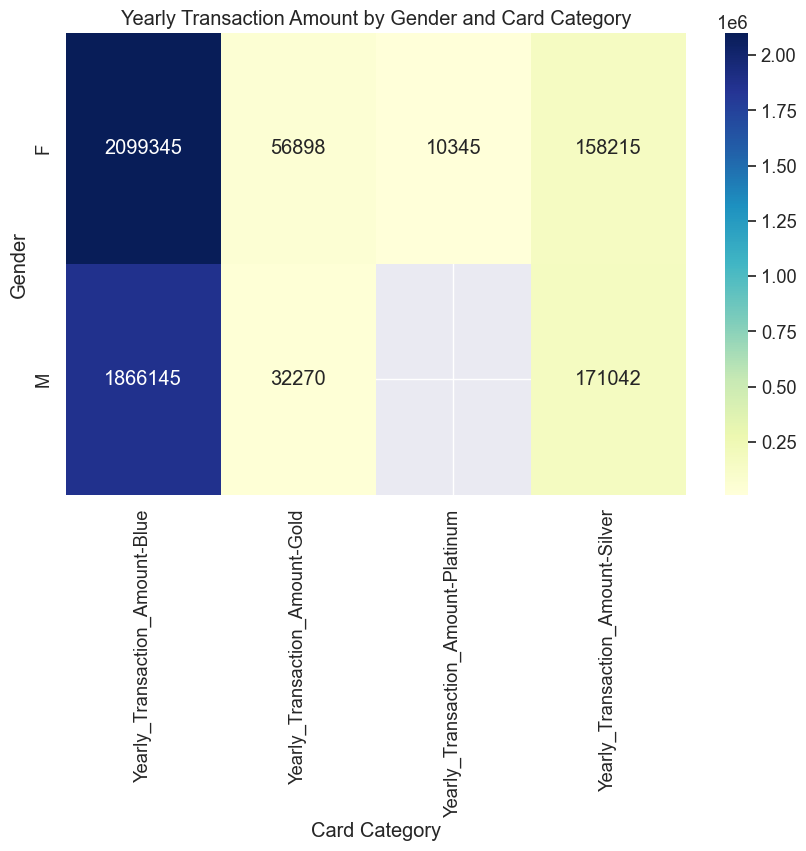

In [84]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10,6))

# Plot heatmap
sns.heatmap(grouped_pivot6, annot=True, fmt='.0f', cmap='YlGnBu')

# Set title and axis labels
plt.title('Yearly Transaction Amount by Gender and Card Category')
plt.xlabel('Card Category')
plt.ylabel('Gender')

# Show plot
plt.show()

In [85]:
# grouping results
df_gptest4 = df[['Card_Category','Income_Category','Credit_Limit']]
grouped_test7 = df_gptest4.groupby(['Card_Category','Income_Category'],as_index=False).sum()
grouped_pivot8 = grouped_test7.pivot(index='Card_Category',columns='Income_Category')
grouped_pivot8.style.set_properties(**{"background-color": "#112552","color":"white","border": "1px  solid white" })

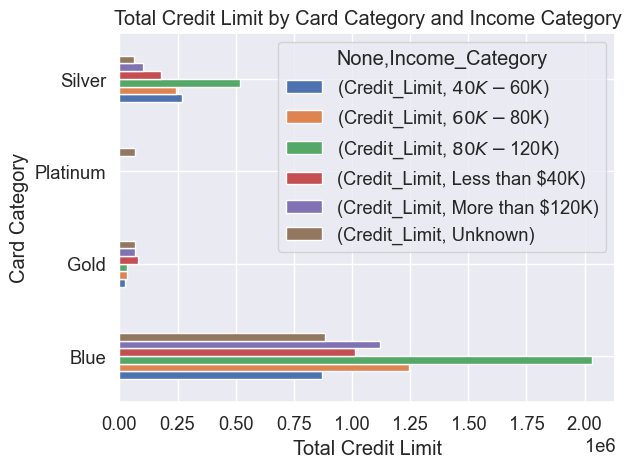

In [86]:
#import matplotlib.pyplot as plt

# Create horizontal bar chart
grouped_pivot8.plot.barh()

# Set chart title and axis labels
plt.title('Total Credit Limit by Card Category and Income Category')
plt.xlabel('Total Credit Limit')
plt.ylabel('Card Category')

# Display chart
plt.show()


In [87]:
# grouping results
df_gptest11 = df[['Card_Category','Income_Category','Total_Transactions']]
grouped_test12 = df_gptest11.groupby(['Card_Category','Income_Category'],as_index=False).count()
grouped_pivot13 = grouped_test12.pivot(index='Card_Category',columns='Income_Category')
grouped_pivot13.style.set_properties(**{"background-color": "#985678","color":"white","border": "1px  solid white" })

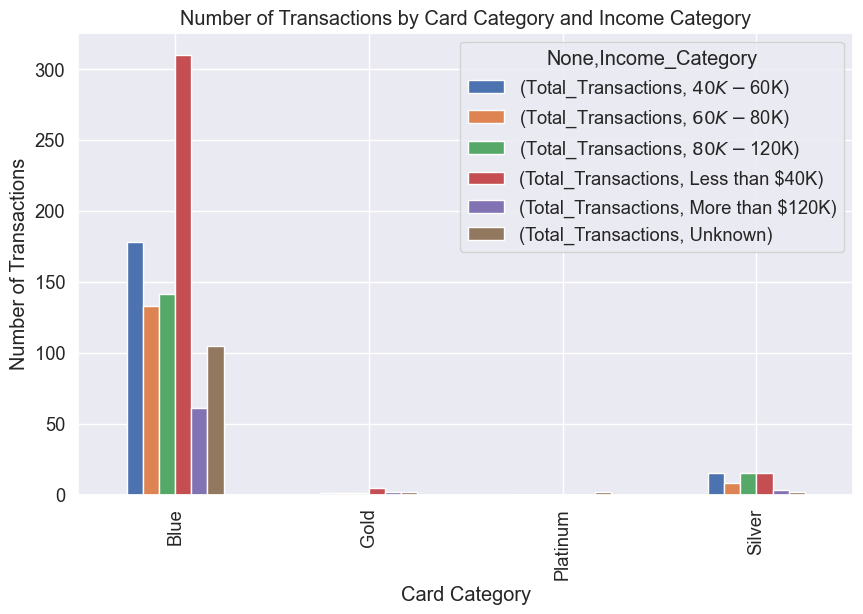

In [88]:
import matplotlib.pyplot as plt

# Create the bar chart
grouped_pivot13.plot(kind='bar', figsize=(10,6))

# Set the chart title and axis labels
plt.title('Number of Transactions by Card Category and Income Category')
plt.xlabel('Card Category')
plt.ylabel('Number of Transactions')

# Show the chart
plt.show()


In [89]:
# grouping results
df_gptest15 = df[['Income_Category','Marital_Status','Months_on_Use']]
grouped_test16 = df_gptest15.groupby(['Income_Category','Marital_Status'],as_index=False).count()
grouped_pivot17 = grouped_test16.pivot(index='Income_Category',columns='Marital_Status')
grouped_pivot17.style.set_properties(**{"background-color": "#990088","color":"white","border": "1px  solid white" })

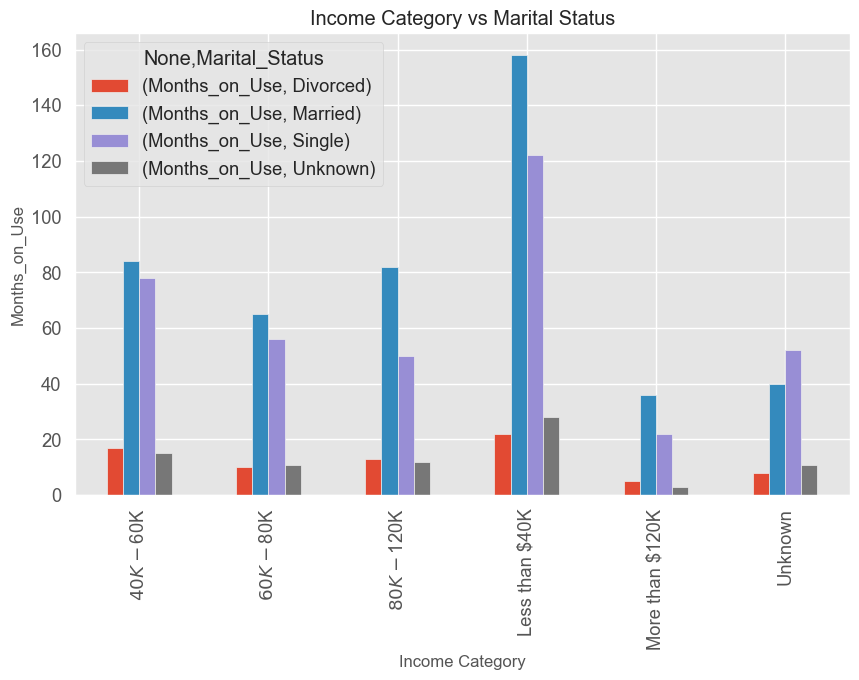

In [90]:
#import matplotlib.pyplot as plt

# Set the style of the plot
plt.style.use('ggplot')

# Create a bar plot
grouped_pivot17.plot(kind='bar', figsize=(10, 6))

# Set the title and labels for the plot
plt.title('Income Category vs Marital Status')
plt.xlabel('Income Category')
plt.ylabel('Months_on_Use')

# Show the plot
plt.show()


In [91]:
# grouping results
df_gptest18 = df[['Card_Category','Marital_Status','Months_on_Use']]
grouped_test19 = df_gptest18.groupby(['Card_Category','Marital_Status'],as_index=False).count()
grouped_pivot20 = grouped_test19.pivot(index='Card_Category',columns='Marital_Status')
grouped_pivot20.style.set_properties(**{"background-color": "#660011","color":"white","border": "1px  solid white" })

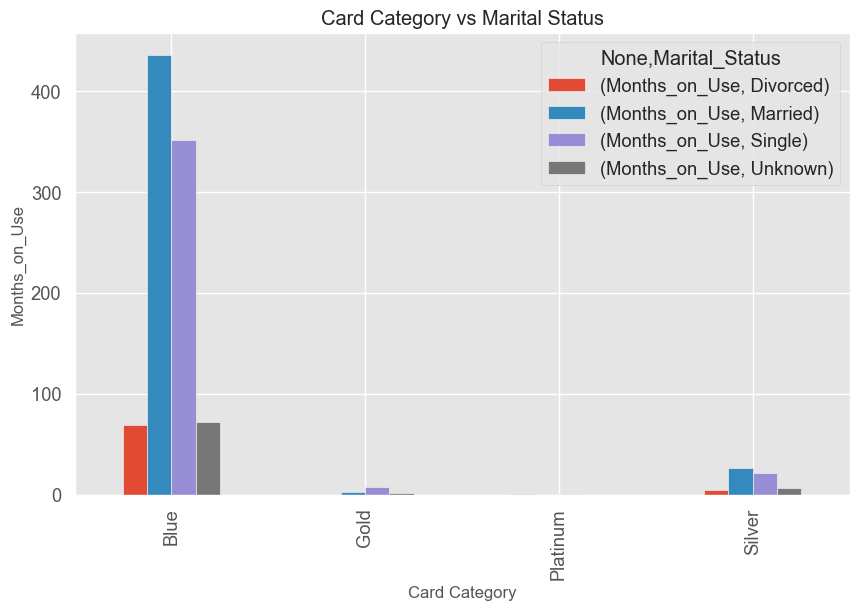

In [92]:
# Set the style of the plot
plt.style.use('ggplot')

# Create a bar plot
grouped_pivot20.plot(kind='bar', figsize=(10, 6))

# Set the title and labels for the plot
plt.title('Card Category vs Marital Status')
plt.xlabel('Card Category')
plt.ylabel('Months_on_Use')

# Show the plot
plt.show()

In [93]:
df_gptest22 = df[['Education_Level','Card_Category','Yearly_Average_Balance']]
grouped_test23 = df_gptest22.groupby(['Education_Level','Card_Category'],as_index=False).sum()
grouped_pivot24 = grouped_test23.pivot(index='Education_Level',columns='Card_Category')
grouped_pivot24.style.set_properties(**{"background-color": "#985678","color":"white","border": "1px  solid white" })

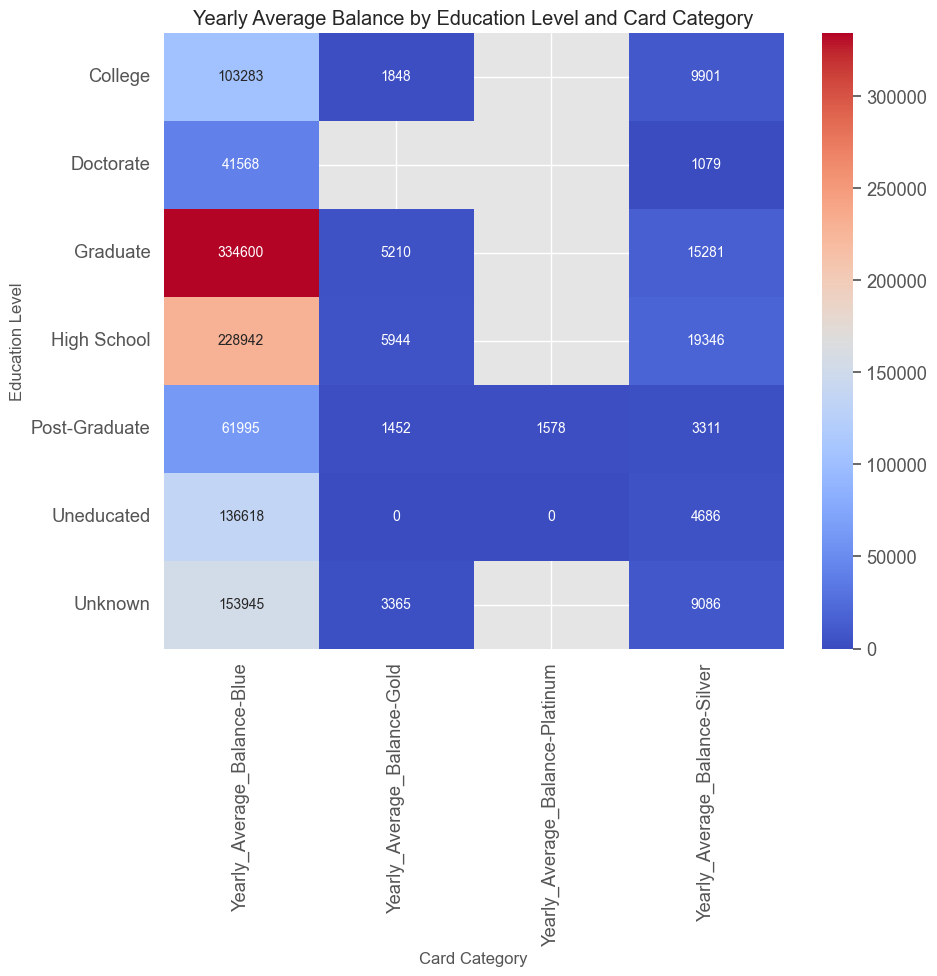

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(grouped_pivot24, annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Yearly Average Balance by Education Level and Card Category')
plt.xlabel('Card Category')
plt.ylabel('Education Level')
plt.show()


In [95]:
top_Customer = df.sort_values(by = 'Yearly_Transaction_Amount', ascending = False).head(10)
top_Customer[['Customer_Number', 'Yearly_Transaction_Amount']].style.set_properties(**{"background-color": "#807000","color":"white","border": "1px  solid white" })

,Customer_Number,Yearly_Transaction_Amount
9964,718140783,18484
9406,780604083,16422
9647,718979733,16258
9928,770824833,16236
9499,815840283,16059
9875,718299933,15903
10032,712128258,15872
9560,708103608,15798
9785,799011558,15740
9283,773283108,15738


<Axes: xlabel='Card_Category', ylabel='Total_Transactions'>

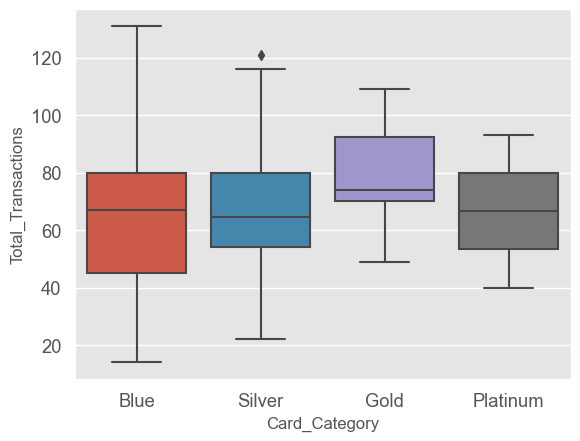

In [96]:
sns.boxplot(x="Card_Category", y="Total_Transactions", data=df)

<Axes: xlabel='Income_Category', ylabel='Total_Transactions'>

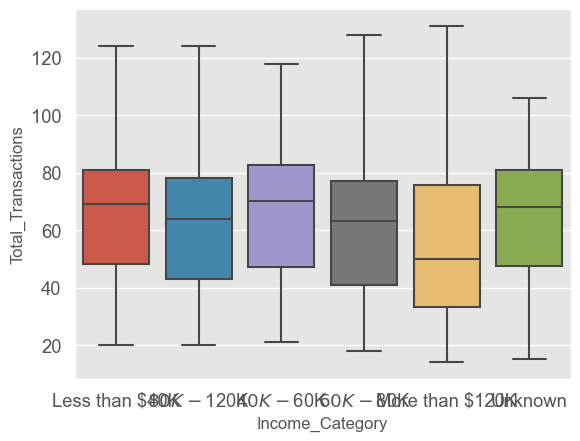

In [97]:
sns.boxplot(x="Income_Category", y="Total_Transactions", data=df)

<Axes: xlabel='Marital_Status', ylabel='Total_Transactions'>

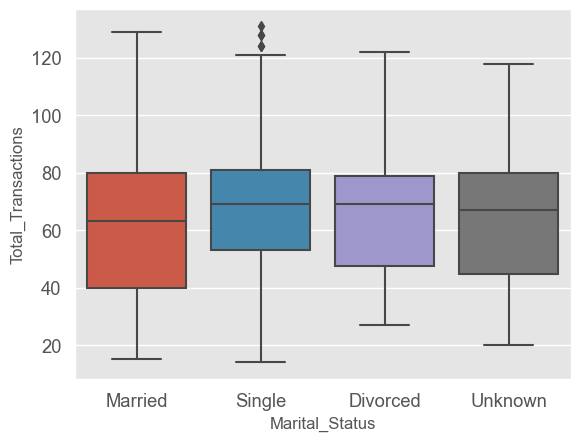

In [98]:
sns.boxplot(x="Marital_Status", y="Total_Transactions", data=df)

<Axes: xlabel='Customer_Status', ylabel='Total_Transactions'>

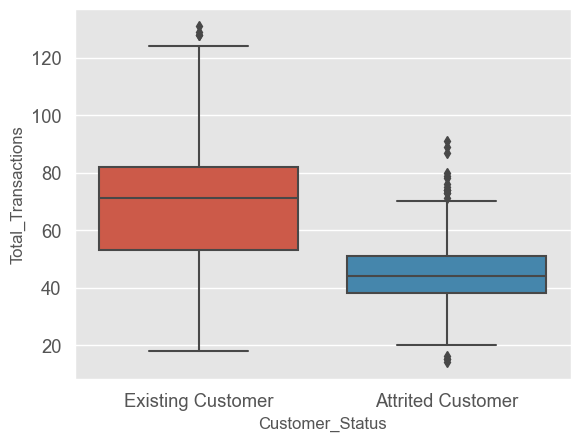

In [99]:
sns.boxplot(x="Customer_Status", y="Total_Transactions", data=df)

## 2. Data Analysis : Inferential Statistics

C:\Users\Dell\AppData\Local\Temp\ipykernel_18064\2458358235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Credit_Limit'],color='blue')


<Axes: xlabel='Credit_Limit', ylabel='Density'>

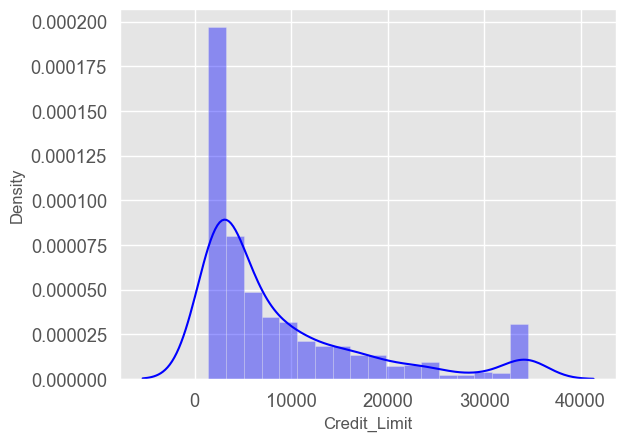

In [100]:
sns.distplot(df['Credit_Limit'],color='blue')

In [127]:
import statsmodels.formula.api as smf


anova_model = smf.ols('Credit_Limit ~ Income_Category', data=df).fit()
anova_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Credit_Limit   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     54.30
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           1.88e-49
Time:                        22:22:51   Log-Likelihood:                -9193.0
No. Observations:                 922   AIC:                         1.840e+04
Df Residuals:                     916   BIC:                         1.843e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           5993.4974    372.832     16.076      0.000    5261.794    6725.201
Income_Category[T.$60K - $80K]      3588.1144    582.028      6.165      0.000    2445.851    4730.378
Income_Category[T.$80K - $120K]     4873.9144    606.247      8.039      0.000    3684.121    6063.708
Income_Category[T.Less than $40K]  -2133.9480    469.809     -4.542      0.000   -3055.976   -1211.920
Income_Category[T.More than $120K]  6153.1305    875.292      7.030      0.000    4435.320    7870.941
Income_Category[T.Unknown]          1900.2457    635.124      2.992      0.003     653.778    3146.713
==============================================================================
Omnibus:                      119.841   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.726
Skew:                           0.975   Prob(JB):                     6.25e-37
Kurtosis:                       3.733   Cond. No.                         6.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Dell\AppData\Local\Temp\ipykernel_18064\1875474854.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yearly_Average_Balance'],color='blue')


<Axes: xlabel='Yearly_Average_Balance', ylabel='Density'>

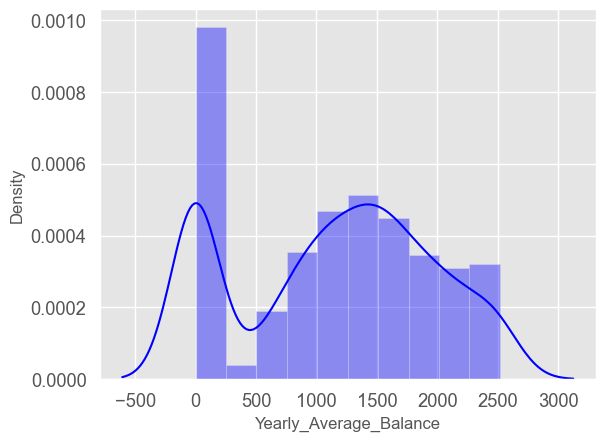

In [101]:
sns.distplot(df['Yearly_Average_Balance'],color='blue')

<Axes: xlabel='Yearly_Transaction_Amount', ylabel='Density'>

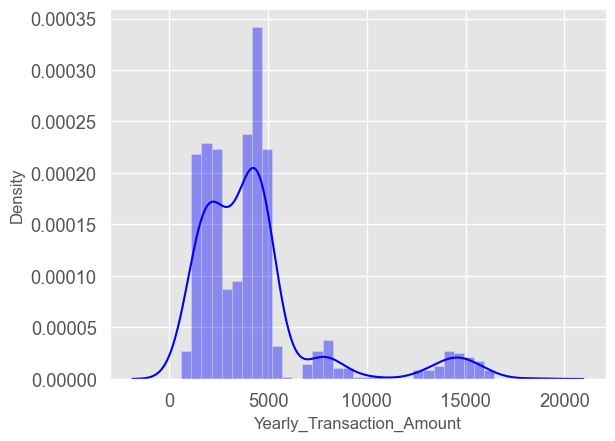

In [118]:
sns.distplot(df['Yearly_Transaction_Amount'],color='blue')

In [147]:
import scipy.stats as sps
correlation_test_pearson = sps.pearsonr(df.Yearly_Transaction_Amount, df.Credit_Limit)
correlation_test_pearson

(0.12720425266247026, 0.00010750785988216242)

(0.0, 19378.1)

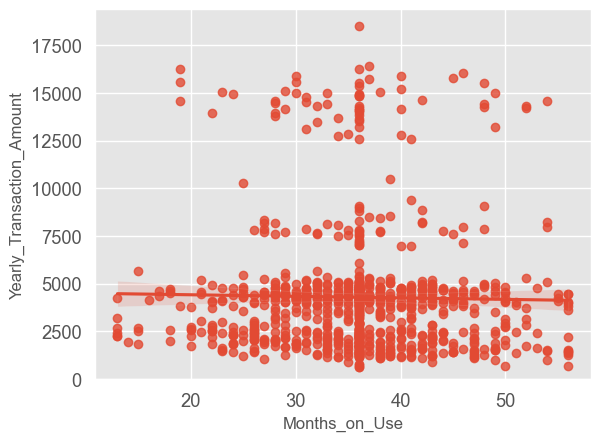

In [150]:
sns.regplot(x="Months_on_Use", y="Yearly_Transaction_Amount", data=df)
plt.ylim(0, )

In [158]:
linear_regression_model1 = smf.ols('Months_on_Use ~ Age', data=df).fit()
linear_regression_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Months_on_Use   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     1346.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          2.90e-182
Time:                        22:38:09   Log-Likelihood:                -2791.4
No. Observations:                 922   AIC:                             5587.
Df Residuals:                     920   BIC:                             5596.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3226      1.002     -0.322      0.748      -2.290       1.645
Age            0.7838      0.021     36.687      0.000       0.742       0.826
==============================================================================
Omnibus:                       10.992   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.023
Skew:                          -0.261   Prob(JB):                      0.00404
Kurtosis:                       3.123   Cond. No.                         286.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
linear_regression_model1 = smf.ols('Total_Transactions ~ Yearly_Transaction_Amount', data=df).fit()
linear_regression_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Transactions   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     1562.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          1.76e-200
Time:                        22:40:39   Log-Likelihood:                -3721.8
No. Observations:                 922   AIC:                             7448.
Df Residuals:                     920   BIC:                             7457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    40.6349      0.751     54.103      0.000      39.161      42.109
Yearly_Transaction_Amount     0.0055      0.000     39.523      0.000       0.005       0.006
==============================================================================
Omnibus:                       63.769   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.834
Skew:                          -0.135   Prob(JB):                     4.05e-06
Kurtosis:                       2.243   Cond. No.                     8.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(0.0, 155.29142079947937)

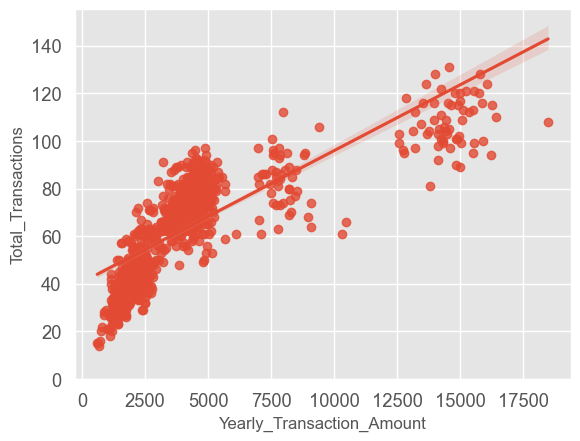

In [164]:
sns.regplot(x="Yearly_Transaction_Amount", y="Total_Transactions", data=df)
plt.ylim(0, )

In [117]:
df.head(5)

,Customer_Number,Customer_Status,Age,Gender,Number_of_Dependents,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_Use,Credit_Limit,Yearly_Average_Balance,Yearly_Transaction_Amount,Total_Transactions
1051,720148983,Existing Customer,54,F,1,Uneducated,Married,Less than $40K,Blue,40,2178.0,1144,1724,47
8118,714320358,Existing Customer,38,F,2,College,Single,Less than $40K,Blue,33,2569.0,1288,4126,56
2070,717171408,Existing Customer,36,M,1,Unknown,Married,$80K - $120K,Blue,26,9959.0,0,2021,41
1729,714772758,Existing Customer,35,F,3,Graduate,Married,Less than $40K,Blue,27,2926.0,1346,1851,48
5509,712428333,Existing Customer,49,M,3,Uneducated,Single,$80K - $120K,Blue,41,2930.0,1901,4041,75
